## first ann model1

In [1]:
pip install tensorflow

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic 2.7.0 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.18.1 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
selenium 4.22.0 requires typing_extensions>=4.9.0, but you have typing-extensions 4.5.0 which is incompatible.
typeguard 4.2.1 requires typing-extensions>=4.10.0; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
# import tensorflow1

import numpy as np

In [6]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.duplicated().sum()

0

In [13]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [14]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [18]:
df.drop(columns=['RowNumber', "CustomerId", "Surname"],inplace = True)

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df =pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

KeyError: "None of [Index(['Geography', 'Gender'], dtype='object')] are in the [columns]"

In [30]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


## scalling

In [35]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [36]:
X_train.shape

(8000, 11)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [41]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [94]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model = Sequential()

# Add layers to the model
model.add(Dense(11, activation='relu', input_dim=11)) 
model.add(Dense(11,activation='relu'))# Corrected 'activationn' to 'activation'
model.add(Dense(1, activation='relu'))  # Corrected 'activationn' to 'activation'

# Summary of the model
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 11)                132       
                                                                 
 dense_12 (Dense)            (None, 11)                132       
                                                                 
 dense_13 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## mdoel compilation

In [102]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam',metrics = ['accuracy'])

In [109]:
history = model.fit(X_train_scaled,y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3466 - accuracy: 0.8581 - val_loss: 0.4384 - val_accuracy: 0.8469
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3447 - accuracy: 0.8598 - val_loss: 0.4295 - val_accuracy: 0.8469
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3585 - accuracy: 0.8580 - val_loss: 0.4210 - val_accuracy: 0.8363
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3696 - accuracy: 0.8573 - val_loss: 0.4270 - val_accuracy: 0.8431
Epoch 5/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3599 - accuracy: 0.8572 - val_loss: 0.4540 - val_accuracy: 0.8506
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3757 - accuracy: 0.8556 - val_loss: 0.4171 - val_accuracy: 0.8444
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3699 - accuracy: 0.8575 - val_loss: 0.4138 - val_accuracy: 0.8512

In [104]:
model.layers[0].get_weights()

[array([[ 0.22569625,  0.24752371, -0.16868848,  0.09876098, -0.25612596,
         -0.23610155,  0.22394407, -0.21701743, -0.1762856 ,  0.00427607,
         -0.13499954],
        [-0.16222553,  0.49769813,  0.5608726 ,  0.5301994 , -0.1731209 ,
          0.48592433, -0.2838606 ,  0.18742688,  0.05581712,  0.31560153,
          0.690902  ],
        [-0.18354817,  0.00089543,  0.07260122, -0.02437746,  0.07362533,
          0.04290396,  0.31652224, -0.25677758,  0.05848667,  0.08933291,
          0.23959626],
        [-0.5207363 , -0.31987053,  0.40456408,  0.26020923,  0.16917898,
         -0.09400471, -0.24683802, -0.32113397, -0.2254909 , -0.24319889,
         -0.15878057],
        [ 0.44554374, -0.10242938, -0.13242802,  0.6555777 ,  0.53569067,
          0.65671474, -0.3631759 , -0.22206864,  0.16533256, -0.63658726,
          0.11132528],
        [ 0.23725593,  0.10821551, -0.10968367, -0.21519427, -0.13374086,
          0.2860487 , -0.2614733 ,  0.16206777, -0.28974062, -0.1413358

In [105]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [106]:
y_pred = np.where(y_log > 0.5,1,0)

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.847

In [108]:
# how to maximize the accuracy first will do is 
# first will increase the epocs
# second is to change the activation function
# 

## plotting graphs to analyze the output data

In [110]:
import matplotlib.pyplot as plt

In [111]:
history.history

{'loss': [0.3465513288974762,
  0.34473925828933716,
  0.3584885001182556,
  0.36959466338157654,
  0.35994693636894226,
  0.3756837844848633,
  0.3698572516441345,
  0.3586510717868805,
  0.3511131703853607,
  0.3458663821220398,
  0.3379444479942322,
  0.3359370827674866,
  0.37783509492874146,
  0.3428531885147095,
  0.33669501543045044,
  0.33428966999053955,
  0.3330190181732178,
  0.3317851126194,
  0.3307783603668213,
  0.33140674233436584,
  0.3294365406036377,
  0.32927531003952026,
  0.33043646812438965,
  0.3306666910648346,
  0.33114147186279297,
  0.33621206879615784,
  0.3354467451572418,
  0.3320458233356476,
  0.332412451505661,
  0.33948367834091187,
  0.33243560791015625,
  0.3311116695404053,
  0.33164647221565247,
  0.331563800573349,
  0.33349645137786865,
  0.33556538820266724,
  0.33963942527770996,
  0.3395215570926666,
  0.34658730030059814,
  0.3364877700805664,
  0.3318988084793091,
  0.3324644863605499,
  0.33073776960372925,
  0.37097302079200745,
  0.35979

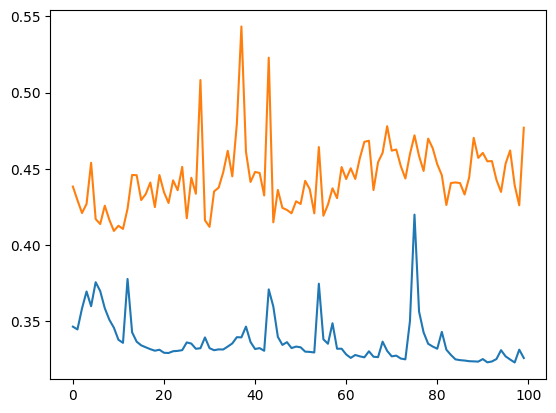

In [114]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

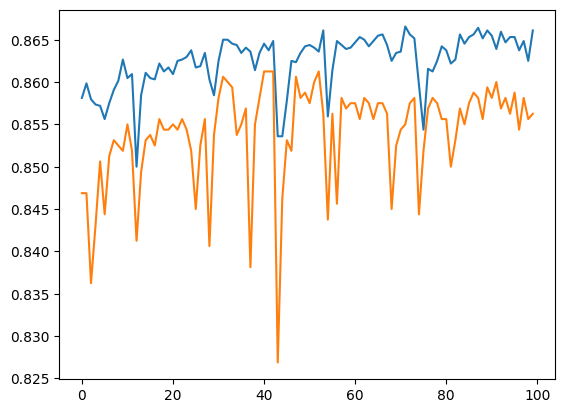

In [115]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])